In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv'
df = pd.read_csv(file_path)
df.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [3]:
df.set_index('Country', inplace=True)
df.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [4]:
df.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [5]:
years = list(map(str, range(1984, 2014)))
years

['1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Pie Charts

In [6]:
# group immigrants by continents
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

In [21]:
df_group_continents = df.groupby('Continent').sum()
df_group_continents.drop(labels=['DevName', 'Region'], axis=1, inplace=True)
df_group_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


<function matplotlib.pyplot.show(close=None, block=None)>

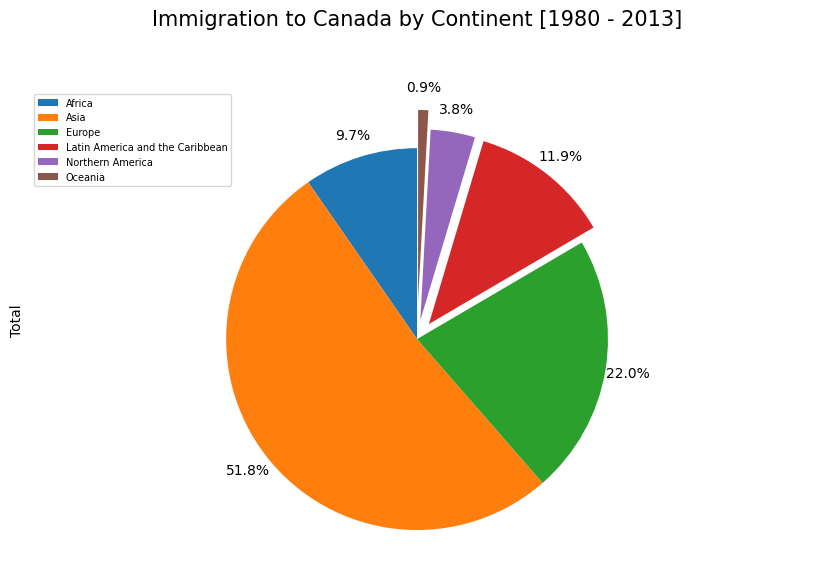

In [39]:
df_group_continents['Total'].plot(
      kind='pie',
      labels=None,
      figsize=(10, 6),
      shadow=False,
      startangle=90,
      autopct='%1.1f%%',
      pctdistance=1.12,
      explode=[0.0, 0, 0, 0.1, 0.1, 0.2]
    )
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15)
plt.axis('equal')
plt.legend(labels=df_group_continents.index, loc='upper left', fontsize=7)
plt.show

# Box Plots

In [53]:
# the Japanese immigrants between 1980 - 2013.
df_japan = df.loc[['Japan'], years]
df_japan = df_japan.transpose()
df_japan.head()

Country,Japan
1984,246
1985,198
1986,248
1987,422
1988,324


In [47]:
df_japan.describe()

Country,Japan
count,30.000000
mean,844.766667
std,342.731591
min,198.000000
25%,530.750000
50%,940.000000
75%,1089.750000
max,1284.000000


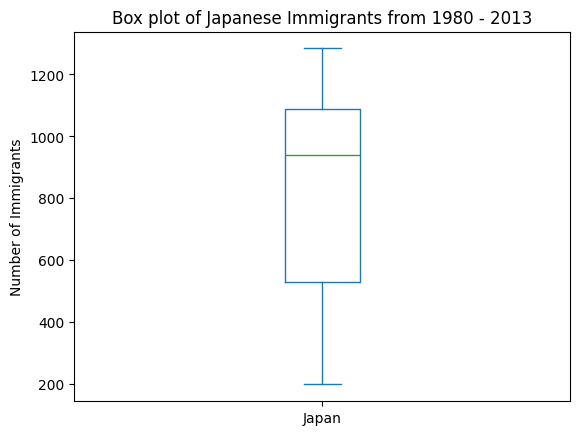

In [46]:
df_japan.plot(kind='box')
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

# minimum number: around 200 (min)
# maximum number: around 1300 (max)
# median: around 900 (median).
# 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
# 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

In [54]:
# Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.
df_chi_ind = df.loc[['China', 'India'], years]
df_chi_ind = df_chi_ind.transpose()
df_chi_ind.head()

Country,China,India
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522


In [56]:
df_chi_ind.describe()

Country,China,India
count,30.000000,30.000000
mean,21432.866667,21962.300000
std,13155.758704,9542.380767
min,1527.000000,4211.000000
25%,10074.250000,13688.250000
50%,24345.500000,23063.500000
75%,32758.250000,29277.500000
max,42584.000000,36210.000000


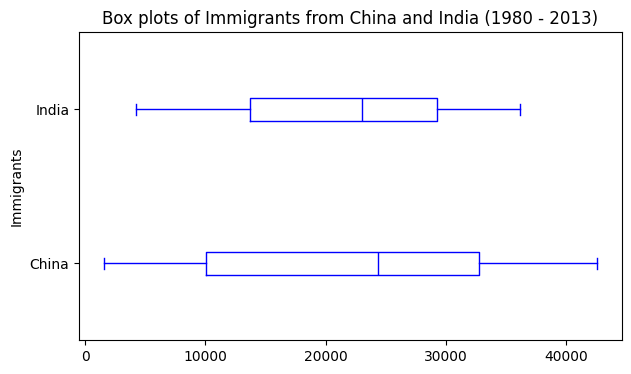

In [64]:
df_chi_ind.plot(kind='box', figsize=(7,4), color='blue', vert=False)
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Immigrants')
plt.show()

# Scatter Plots

In [75]:
# Trend of total immigrantion to Canada for the years 1980 - 2013.
df_total_per_year = pd.DataFrame(data=df[years].sum(axis=0))
df_total_per_year.reset_index(inplace = True)
df_total_per_year.columns = ['Year', 'Total']
df_total_per_year.head()

,Year,Total
0,1984,73417
1,1985,69978
2,1986,86048
3,1987,134771
4,1988,139306


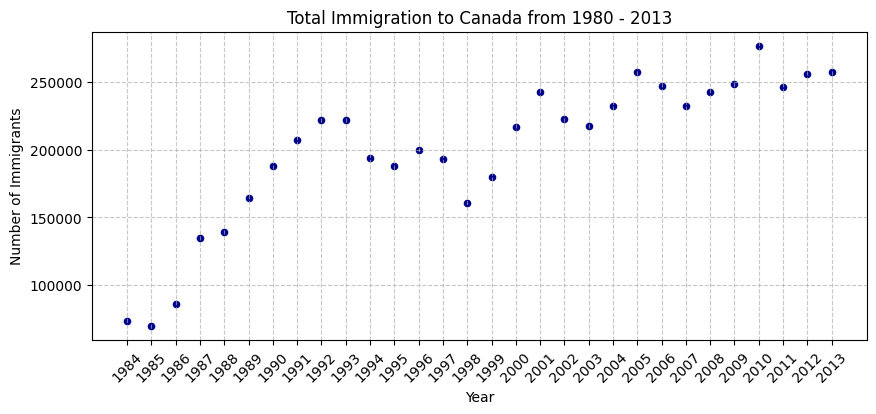

In [85]:
df_total_per_year.plot(kind='scatter', x='Year', y='Total', figsize=(10, 4), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [88]:
df_total_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    30 non-null     object
 1   Total   30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [89]:
df_total_per_year['Year'] = df_total_per_year['Year'].astype(int)
df_total_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    30 non-null     int64
 1   Total   30 non-null     int64
dtypes: int64(2)
memory usage: 612.0 bytes


In [96]:
# polynomial regression
x = df_total_per_year['Year']
y = df_total_per_year['Total']
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.36613437e+03, -1.05235651e+07])

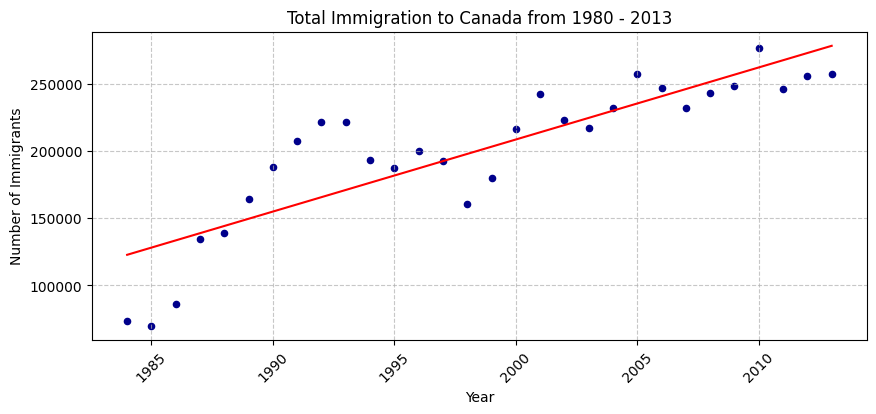

In [97]:
df_total_per_year.plot(kind='scatter', x='Year', y='Total', figsize=(10, 4), color='darkblue')

plt.plot(x, fit[0]* x + fit[1], color='red')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# Bubble Plots

In [98]:
df_can_t = df[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32
1,1985,340,0,44,0,0,3,52,196,0,...,6543,92,0,0,165,5907,0,18,9,29
2,1986,496,1,69,0,2,5,51,213,0,...,7074,137,0,0,179,2741,0,7,15,43
3,1987,741,2,132,1,0,5,61,519,0,...,7705,269,0,0,229,1406,0,12,23,68
4,1988,828,2,242,0,0,11,34,374,0,...,6469,99,0,0,279,1411,0,7,44,99


In [103]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())
norm_brazil.head()
# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())
norm_argentina.head()

,Argentina
0,0.026469
1,0.000000
2,0.010975
3,0.208522
4,0.114913


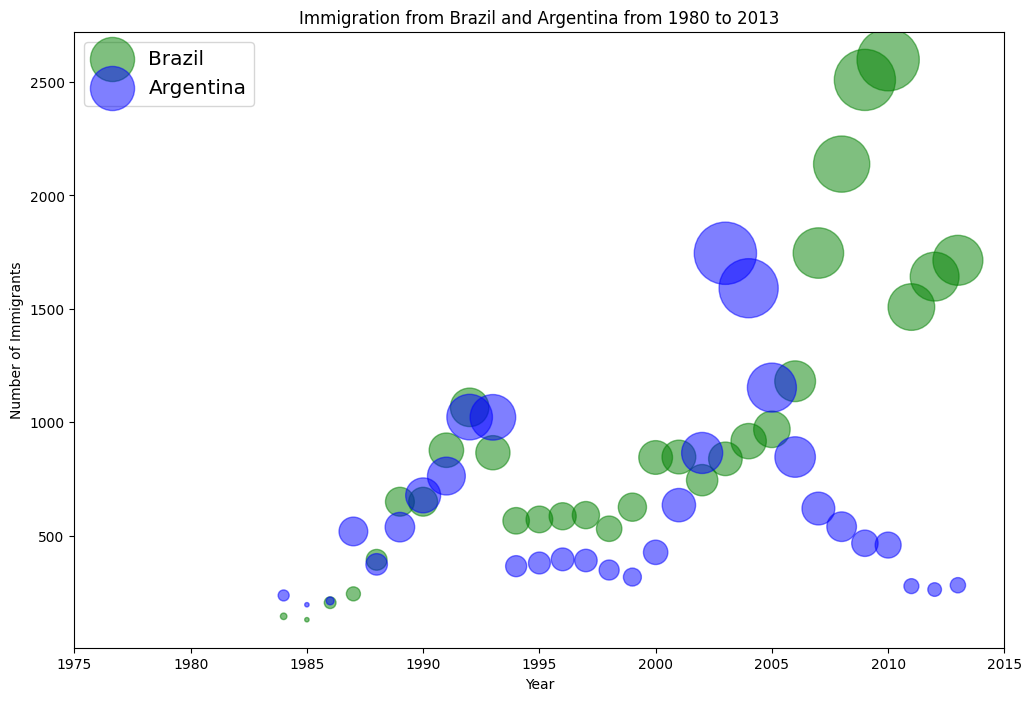

In [105]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(12, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

# Subplots

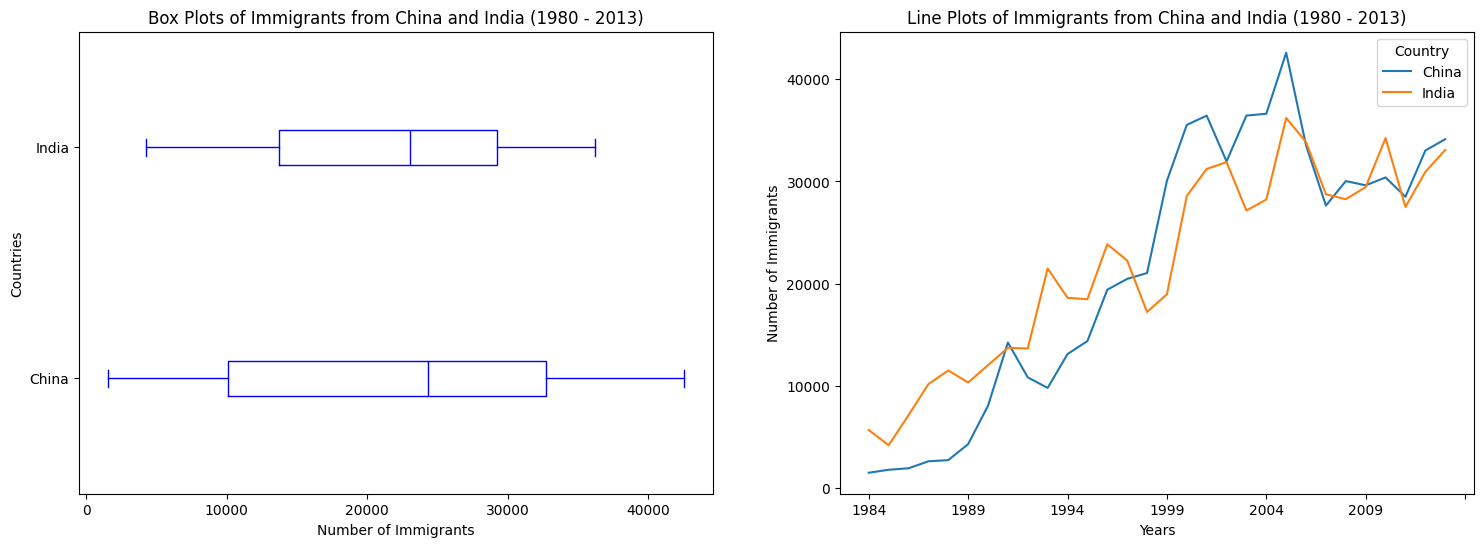

In [107]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_chi_ind.plot(kind='box', color='blue', vert=False, figsize=(18, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_chi_ind.plot(kind='line', figsize=(18, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()